PROJECT TITLE: WINE QUALITY

PROJECT GOAL : TO MAKE CLASSIFICATION MODEL TO PREDICT WINE QUALITY

STEP 1 : IMPORT ALL LIBRARIES REQUIRED TO PERFORM ON DATASET

In [43]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

STEP 2 : CHECK DATA HEAD, INFO, DESCRIPTION TO UNDERSTAND DATASET STATATICALLY

In [2]:
df = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.isnull().sum()

#NO NULL VALUES IN DATASET SO WE NOT NEED TO WORK ON IT

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

#ALL COLUMN ARE EITHER FLOAT64 OR INT64 SO NO OBJECTIVE COLUMN IN DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.corr()

#HERE, WE CAN SEE THAT THERE ARE MANY PARAMETERS BUT MOST OF HAVE VERY LOW CORRELATION WITH WINE QUALITY, WE WILL WORK ON IT.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [7]:
print("Quality Range:",df['quality'].unique())

Quality Range: [5 6 7 4 8 3]


In [8]:
print(df['quality'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


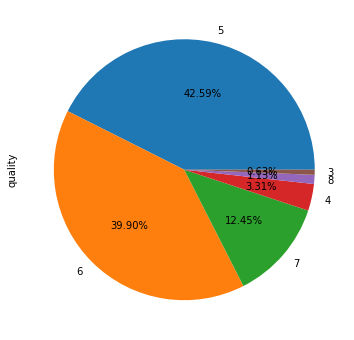

In [9]:
plt.figure(1, figsize=(6,6))
df['quality'].value_counts().plot.pie(autopct="%1.2f%%")

IndexError: ignored

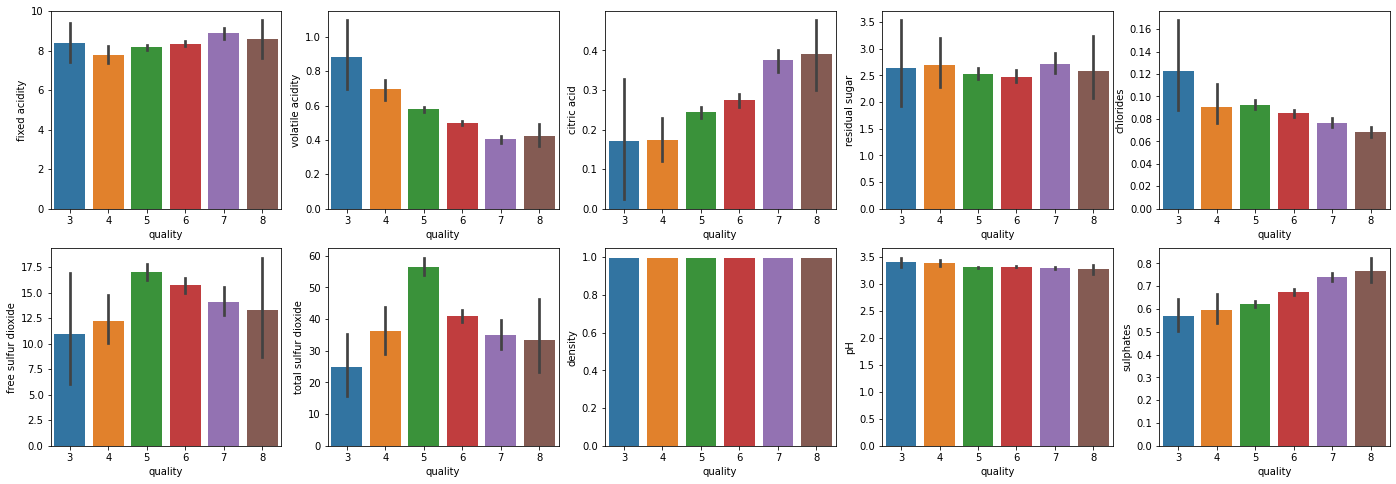

In [10]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(24, 8))
ax = ax.flatten()
index=0
for i in df.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=df, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show

#conclusion
#As Volatile Acidity increase - quality of wine - DECREASE
#Citric acid is a import to increase quality of wine
#Sulphates is a import to increase quality of wine
#chloride level should be low for better wine quality
#Features fixed acidity and residual sugar might not give any specification to classify/predict the quality.

In [11]:
#as discussed in datset let we define wine quality in two sets of 'Good' Quality and 'Bad' QUality. above 6.5 is good quality and below 6.5 is consider as BAD quality

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [12]:
#now we have two quality and both are in OBJECTIV dtype so we will encode it for process

label_quality = LabelEncoder()

In [13]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [14]:







df['quality'].value_counts()

# we have 1382 bad quality wine and 217 good quality wine

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


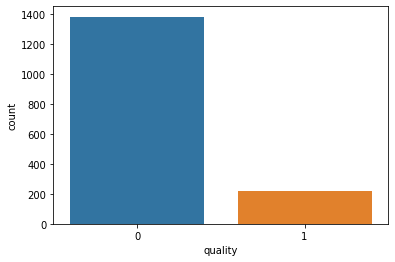

In [15]:
sns.countplot(df['quality'])

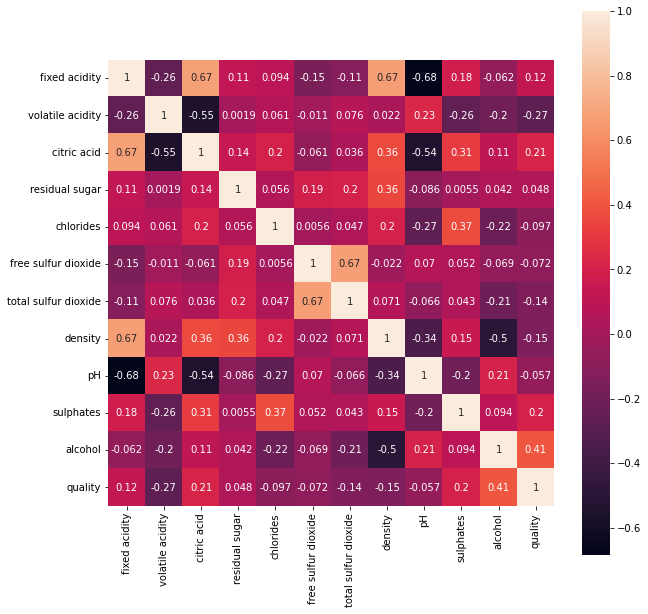

Correlation of different features of our dataset with quality:
fixed acidity : 0.1201
volatile acidity : -0.2707
citric acid : 0.2147
residual sugar : 0.0478
chlorides : -0.0973
free sulfur dioxide : -0.0717
total sulfur dioxide : -0.1395
density : -0.1505
pH : -0.0573
sulphates : 0.1995
alcohol : 0.4073
quality : 1.0000


In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(method='pearson'), annot=True, square=True)
plt.show()

print('Correlation of different features of our dataset with quality:')
for i in df.columns:
  corr, _ = pearsonr(df[i], df['quality'])
  print('%s : %.4f' %(i,corr))

In [17]:
df.drop(['fixed acidity'], axis = 1, inplace = True)
df.drop(['residual sugar'], axis = 1, inplace = True)

In [18]:
df.skew()

volatile acidity        0.671593
citric acid             0.318337
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


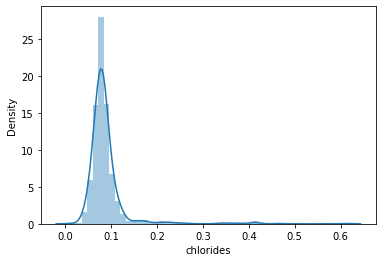

In [19]:
sns.distplot(df['chlorides'])
#Right skewed


In [20]:
from scipy.stats import zscore
di=df.select_dtypes('float')
z_score=zscore(di)
print(di.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape) 

(1599, 9)
(1488, 10)


In [21]:



from scipy.stats import boxcox
for col in di:
    if df_1[col].skew()>=.6:
        df_1[col]=np.cbrt(df[col]) ## For Right skewed data we use log,square root,cube root transformation
    if df_1[col].skew()<=-.6:
        df_1[col]=np.power(df_1[col],2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
df_1.skew()

volatile acidity        0.385650
citric acid             0.299972
chlorides               0.731995
free sulfur dioxide     0.121090
total sulfur dioxide    0.328932
density                -0.042401
pH                      0.062989
sulphates               0.505150
alcohol                 0.640476
quality                 2.095911
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


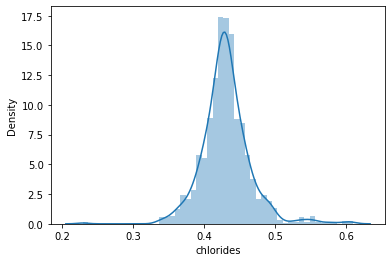

In [23]:
sns.distplot(df_1['chlorides'])
#Right skewed

In [24]:


X = df.drop('quality', axis = 1)
y = df['quality']

#drop Quality column from data

In [25]:
#split our data in two group of test data and train data, here we take test size 0f .2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [26]:
#import standardscaler to treat all data on scaled    
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#fit the x_train and X_test

RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#we use randomforestsclassifier where we are taking estimator value 200

In [29]:

#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

#here we get a accuracy of 87%

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.66      0.40      0.50        47

    accuracy                           0.88       320
   macro avg       0.78      0.68      0.72       320
weighted avg       0.87      0.88      0.87       320



In [30]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

#confusion matrix can be use to know that from how many true positive predicted and true negative predicted.

[[263  10]
 [ 28  19]]


In [31]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

#Let we try SGD classifier to find better accuracy

In [32]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       273
           1       0.47      0.70      0.56        47

    accuracy                           0.84       320
   macro avg       0.71      0.78      0.73       320
weighted avg       0.87      0.84      0.85       320



In [33]:
print(confusion_matrix(y_test, pred_sgd))

[[236  37]
 [ 14  33]]


In [34]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [35]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.69      0.23      0.35        47

    accuracy                           0.87       320
   macro avg       0.78      0.61      0.64       320
weighted avg       0.85      0.87      0.84       320



GridSearchCV

In [36]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10) 

In [37]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [38]:
grid_svc.best_params_

{'C': 1.3, 'gamma': 0.8, 'kernel': 'rbf'}

SupportVectorClassifier

In [39]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.80      0.34      0.48        47

    accuracy                           0.89       320
   macro avg       0.85      0.66      0.71       320
weighted avg       0.88      0.89      0.87       320



In [40]:

#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9132443405511811

SAVE THE MODEL

In [45]:
import pickle

model = LogisticRegression()

model.fit(X_train, y_train)

# save the model to disk

filename = 'finalized_model.sav'

pickle.dump(model, open(filename, 'wb'))



LOAD THE MODEL

In [46]:
loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.score(X_test, y_test)

print(result)


0.865625
